### **Import Libraries**

In [120]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os 
from matplotlib import font_manager 
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Set Paths**

In [121]:
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
github_folder

'/Users/ppower1/Documents/GitHub'

### **Style**

In [122]:
locations = github_folder + '/evictions/styles/Newsreader'
font_files = font_manager.findSystemFonts(fontpaths=locations)
print(locations)
print(font_files[0])
for f in font_files: 
    font_manager.fontManager.addfont(f)
plt.rcParams["font.family"] = "Newsreader"

/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader
/Users/ppower1/Documents/GitHub/evictions/styles/Newsreader/static/Newsreader_9pt/Newsreader_9pt-MediumItalic.ttf


### **Read in Data**

In [123]:
df = pd.read_csv("./../data/GDP.csv")
df1 = pd.read_csv("./../data/GFDEBTN.csv")
df = pd.merge(df, df1, how='left', on='observation_date')

### **Convert to Date Time**

In [124]:
# Convert observation_date to datetime format if it's not already
df['observation_date'] = pd.to_datetime(df['observation_date'])

#### **Convert to Billions**

In [125]:
df['GFDEBTN'] =  df['GFDEBTN'] / 1000

### **Plot**

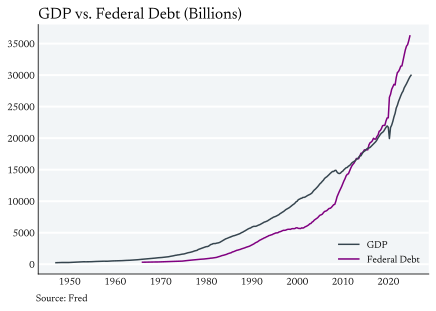

In [126]:
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)

# Set the facecolor directly on the existing axes
ax.set_facecolor((.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'right', 'top':
    ax.spines[key].set_visible(False)

ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

plt.plot(df['observation_date'], df['GFDEBTN'], color='purple')
plt.plot(df['observation_date'], df['GDP'], color='#36454F')

plt.title('GDP vs. Federal Debt (Billions)', loc='left', size=16)
plt.legend(handles=[gdp_line, debt_line], loc='lower right', frameon=False)
ax.text(0.06, -0.1, 'Source: Fred', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

fig.savefig('./../figures/gdp.png')
plt.show()